### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing dataset

In [2]:
df=pd.read_csv('mail_data.csv')

### Exploratory data analysis

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<AxesSubplot:xlabel='Category', ylabel='count'>

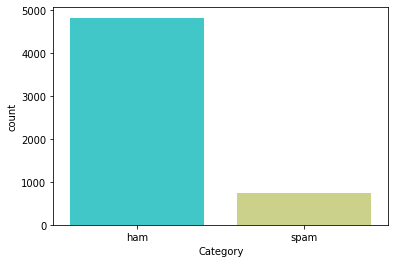

In [7]:
sns.countplot(x='Category',data=df,palette='rainbow')
# Here ham means normal mail 

In [8]:
df.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

### Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Category']=le.fit_transform(df['Category'])

In [10]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Separating dependent and independent variables

In [11]:
X=df['Message']
y=df['Category']

In [12]:
X.shape

(5572,)

In [13]:
y.shape

(5572,)

### Performing train-test split

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [15]:
X_train.shape

(3900,)

In [16]:
y_train.shape

(3900,)

In [17]:
X_test.shape

(1672,)

In [18]:
y_test.shape

(1672,)

### Converting email into feature vectors

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

In [20]:
X_train=tv.fit_transform(X_train)
X_test=tv.transform(X_test)

### Fitting logisticRegression Algorithm

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_hat=lr.predict(X_test)
from sklearn.metrics import f1_score
f1_score(y_hat,y_test)

0.8550368550368551

### Fitting RandomForest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()
rc.fit(X_train,y_train)
y_hat1=rc.predict(X_test)
f1_score(y_hat1,y_test)

0.8978622327790974

### Fitting Support vector classifier

In [23]:
from sklearn.svm import SVC
sc=SVC(kernel='rbf')
sc.fit(X_train,y_train)
y_hat2=sc.predict(X_test)
f1_score(y_hat2,y_test)

0.9133489461358314

<AxesSubplot:>

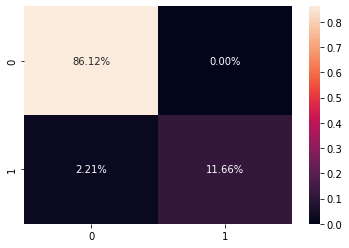

In [24]:
from sklearn.metrics import confusion_matrix
a=confusion_matrix(y_test,y_hat2)
sns.heatmap(a/np.sum(a),annot=True,fmt='.2%')

#### Due to high accuracy we are going to use support vector classifer

### Prediction system

In [25]:
input_mail= [input("Enter your mail:")]

input_mail1=tv.transform(input_mail)

a=sc.predict(input_mail1)

if a[0]==0:
    print("Mail is not spam")
else:
    print("Mail is spam")
    

Enter your mail:"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
Mail is not spam


In [26]:
input_mail= [input("Enter your mail:")]

input_mail1=tv.transform(input_mail)

a=sc.predict(input_mail1)

if a[0]==0:
    print("Mail is not spam")
else:
    print("Mail is spam")
    

Enter your mail:"URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18"
Mail is spam
